# Finding a Planet

## Overview from previous lectures:

* Opening a fits image
* Plotting the image
* Finding all of the objects in the image
* Measuring fluxes and magnitudes of stars

## New objectives for this lecture

* Make a light curve of a star from many images taken at different times.
* Calibrate our light curve using a reference object to find the signal of a planetary transit


Data for this lecture should be downloaded from here and "untarred":<br>
https://www.dropbox.com/s/ycoikiu6jnxcadt/planet_x.tar.gz?dl=0 <br>

Let's start using the magic function we learned last time "%pylab inline".
<br> Then we can import the packeages we will use today: sep, glob, astropy.
<br> From astropy we will import: fits and wcs


In [73]:
%pylab inline

from astropy.io import fits
from astropy import wcs as wcs
import sep
import glob
from astropy.wcs import WCS


Populating the interactive namespace from numpy and matplotlib


We will use the command glob to make a list of all the images in our directory. Then we'll plot the first image as in previous lectures and mark stars at the following 5 positions:

<br> STAR1_RA = 268.020833333
<br> STAR1_DEC = 37.5114388889

<br> STAR2_RA = 268.02924375
<br> STAR2_DEC = 37.5461769444

<br> STAR3_RA = 268.018954167
<br> STAR3_DEC = 37.5375666667

<br> STAR4_RA = 268.039104167
<br> STAR4_DEC = 37.5067611111

We'll use this star as a reference star to calibrate our flux measurements between night: 
<br> STD_RA = 268.059616667 
<br> STD_DEC = 37.5372694444

In [74]:
imglist = glob.glob('*fits')

STAR1_RA = 268.020833333
STAR1_DEC = 37.5114388889

STAR2_RA = 268.02924375
STAR2_DEC = 37.5461769444

STAR3_RA = 268.018954167
STAR3_DEC = 37.5375666667

STAR4_RA = 268.039104167
STAR4_DEC = 37.5067611111

STD_RA = 268.059616667 
STD_DEC = 37.5372694444


In order to do show the positions of these stars, we'll need to use the package <font color='blue'> wcs </font>. This allows us to convert the sky coordinates to pixels in the image.

# Opening an image and plotting stars
 <font color='blue'> Exercise: Read in the first image as we learned 
        in previous lectures and define the data and the header.
 </font>

Hints: 
* our file is now the first image from the list we made above (0th element): `imglist[0]`
* we'll again use the astropy.io function: `fits.open(filename)` to open the file
* this returns an HDU list, our data and header will be in the 0th item in this list (`list[0].data, list[0].header`)
* lets call them `img` and `header` respectively 

In [75]:
hdu = fits.open(imglist[0])
header = hdu[0].header
img = hdu[0].data

#hdu = fits.open("FILL THIS IN")
#header = "FILL THIS IN"
#img = "FILL THIS IN"


 <font color='blue'> Exercise: Convert the sky cooridnates of the stars to image pixel coordinates, and plot the image with markers for the stars overlaid. 
 </font>

Hints: 
* define the "world coordinate system" of the image using `WCS(header)`. Call this `w`.
* use `w.wcs_world2pix(STAR_RA, STAR_DEC, 1)` for each star to get the pixel coordinates in the image. The 3rd arguement defines the "origin", which should be `1` for fits images.
* plot the image using `plt.imshow` as in previous lectures. Recall using a histogram find good values of "vmin" and "vmax" for the display.
* plot the positions of each star using the pixel coordinates using `plt.plot`. You can use a different symbol/color for each star, give them a label, and make a legend. 
* You can also use the `plt.xlim` and `plt.ylim` commands to zoom in the region around stars.  


(400.0, 800.0)

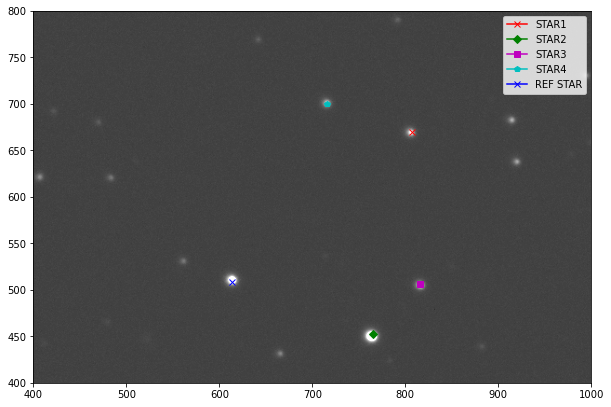

In [76]:
w = WCS(header)

#transform star coordinates to image pixels:
px1, py1 = w.wcs_world2pix(STAR1_RA,STAR1_DEC, 1)
px2, py2 = w.wcs_world2pix(STAR2_RA,STAR2_DEC, 1)
px3, py3 = w.wcs_world2pix(STAR3_RA,STAR3_DEC, 1)
px4, py4 = w.wcs_world2pix(STAR4_RA,STAR4_DEC, 1)
std_px, std_py = w.wcs_world2pix(STD_RA,STD_DEC, 1)

#Plot the image. We'll set vmin=50 and vmax=1800 to scale the image display,
#but recall using histograms to find good values for these parameteres
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, origin='lower', cmap='gray', vmin=50, vmax=1800)

#add each star to the plot with a label, then add a legend
plt.plot(px1, py1, marker='x', color='r', label = 'STAR1')
plt.plot(px2, py2, marker='D', color='g', label = 'STAR2')
plt.plot(px3, py3, marker='s', color='m', label = 'STAR3')
plt.plot(px4, py4, marker='p', color='c', label = 'STAR4')
plt.plot(std_px, std_py, marker='x', color='b',label = 'REF STAR')
plt.legend()


#Let's zoom in to the region around the stars
plt.xlim(400, 1000)
plt.ylim(400, 800)


# Measuring stellar fluxes
 <font color='blue'> Exercise: Measure the flux of one of our stars, and the reference star.
 </font>

Hints: 
* We'll need to extract the objects from the image using the `sep` package as in prior lectures. You could try just measuring the fluxes of the pixels returned by `wcs_world2pix` above, but `sep` extraction will give better positions for the stars.
* Remember that to find all the stars in the image we should first subtract the background using these commands:
<br> <font color='blue'> img  = img.byteswap().newbyteorder()
<br> bkg = sep.Background(img) #compute the background of the image
<br> data_sub = img - bkg #subtract the background to the image </font>
* Recall that `sep` outputs a NumPy structured array that we'll call `objects`, and the x and y positions of the extracted sources are stored in `objects['x']` and `objects['y']`.
* Using the Pythagorean Theorem, check the distance (in pixels) of each extracted source to find the objects nearest to one of our stars, and the reference star. 5 pixels is a good threshold for matching sources in our images.
* Compute the flux of the star and the standard in circular apertures using `sep.sum_circle` as in previous lectures.


In [77]:
#open the first image in our list again
hdu = fits.open(imglist[0])
header = hdu[0].header
img = hdu[0].data
img = img.byteswap().newbyteorder()
# compute the background of the image
bkg = sep.Background(img)
# subtract the background to the image
data_sub = img - bkg

# extract all the object in the image 
objects = sep.extract(data_sub, thresh=3.0, err=bkg.globalrms, mask=None, \
                    minarea=10, clean=True, filter_type = 'matched',\
                    clean_param=1.0, segmentation_map=False)


star = False
std  = False
for i in range(len(objects)):
    #check if object is close to star 1, and store the index in a variable. 
    if (objects['x'][i] - px1)**2 + (objects['y'][i] - py1)**2 < 25:
            star=i  
    #check if the object is close to the standard, and store the index in a variable
    if (objects['x'][i]-std_px)**2+(objects['y'][i]- std_py)**2 < 25:
            std=i
            
    #once you have both objects, find the flux and error of each one.
    #then we'll print out each one.
    #We then use "break" to exit the loop
    if std is not False and star is not False:
        # measure the flux in a 5 pixel circle around object position from sep
        fluxstar, fluxstarerr, flagstar = sep.sum_circle(data_sub, [objects['x'][star]], [objects['y'][star]],
                                     5.0, err=bkg.globalrms, gain=1.0)
        fluxstd, fluxstderr, flagstd = sep.sum_circle(data_sub, [objects['x'][std]], [objects['y'][std]],
                                     5.0, err=bkg.globalrms, gain=1.0)
        
        print('Found a nearby object to the star and the standard')
        print(fluxstar, objects['x'][star], objects['y'][star], px1, px2)
        print(fluxstd, objects['x'][std], objects['y'][std], std_px, std_py)
        
        break
        

Found a nearby object to the star and the standard
[53611.8219104] 805.9256248419202 668.8344906226628 807.0200994297325 764.9094445313767
[143448.75235596] 613.9205769038546 510.5428683509779 613.7780669815903 508.41522598559123


/Users/jacobjencson/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Making a light curve

Now we want to repeat this for all the images, and storing the the flux and date/time for each image in vectors.
 <br>
 <font color='blue'> Exercise: First, lets store the time (Julian Date) of each image in a python list. 
 </font>

Hints: 
* Define an empty list called `jd_vector` using `[]` to store the times in. 
* Loop through the images in `imglist`.
* For each image, the time of observation is stored in the header as 'jd' (Julian Date), a common time system used by astronomers. 
* Get the JD of each image and add it to our vector using `jd_vec.append`.


In [78]:
jd_vec = []
for img in imglist:
    hdu= fits.open(img)
    header = hdu[0].header
    jd_vec.append(header['jd'])
print(jd_vec)


[2455814.6614930555, 2455814.7651388887, 2455814.736701389, 2455814.723900463, 2455814.777627315, 2455814.673622685, 2455814.769201389, 2455814.6655324074, 2455814.7322569443, 2455814.781979167, 2455814.6777546294, 2455814.8043981483, 2455814.699363426, 2455814.6902199076, 2455814.795, 2455814.7075462965, 2455814.746226852, 2455814.758912037, 2455814.7544791666, 2455814.7483333335, 2455814.756724537, 2455814.7441666666, 2455814.734560185, 2455814.7754166666, 2455814.6716087963, 2455814.725960648, 2455814.6757523147, 2455814.7798263887, 2455814.7217708332, 2455814.6635185187, 2455814.7672569444, 2455814.709571759, 2455814.6880324073, 2455814.792881944, 2455814.802210648, 2455814.697337963, 2455814.784224537, 2455814.6797685185, 2455814.739895833, 2455814.7524305554, 2455814.8063541665, 2455814.701377315, 2455814.801238426, 2455814.6963541666, 2455814.7885648147, 2455814.6838194444, 2455814.7134722224, 2455814.7054861113, 2455814.6923032408, 2455814.7969444445, 2455814.717592593, 2455814

<br> <font color='blue'> Exercise: Lets also store the flux and error for our star from each image. </font>

Hints: 
* Define empty lists called `flux_vec` and `fluxerr_vec` to store the fluxes and their errors.
* Again, loop through the images in `imglist`.
* For each image in the loop, you'll need to repeat the process we worked through above:
<br> - open the image and get the header and data.
<br> - define the `wcs` of the image.
<br> - get the image pixel coordinates of our star (let's do star 2 this time).
<br> - subtract the background and extract sources with `sep`.
<br> - Find the source that the closest match to our star.
<br> - measure the flux and error of the matching source using `sep.sum_circle`.
<br> - Then we can add the flux and error to our vectors.


In [79]:
#define the empty vectors for the flux and error. 
flux_vec =[]
fluxerr_vec =[]

#loop through the images
for img in imglist:
    #open the image and get the header and data
    hdu= fits.open(img)
    header = hdu[0].header
    img = hdu[0].data

    #store the wcs for this image as 'w', and get the image pixel coordinates for our star
    w = WCS(header)
    px, py = w.wcs_world2pix(STAR2_RA, STAR2_DEC, 1)
    
    #background subtract the image data, and extract sources. 
    img = img.byteswap().newbyteorder()
    bkg = sep.Background(img)
    data_sub = img - bkg 
    objects = sep.extract(data_sub, thresh=3.0, err=bkg.globalrms, mask=None, \
                          minarea=10, clean=True, filter_type = 'matched',\
                          clean_param=1.0, segmentation_map=False) 
    
    #loop through the objects and find the nearest one to our star's position
    #again we'll use a distance cutoff of 5 pixels
    for i in range(len(objects)):
        if (objects['x'][i]-px)**2+(objects['y'][i]-py)**2 < 25:
            #use sep.sum_circle to compute the flux of the matching star
            fluxstar, fluxstarerr, flagstar = sep.sum_circle(data_sub, [objects['x'][i]], [objects['y'][i]],
                                     5.0, err=bkg.globalrms, gain=1.0)
            
            #fluxstar and fluxstarerr are arrays, but we have one object, 
            #so we just take the first element of this array and append it to our vectors
            flux_vec.append(fluxstar[0])
            fluxerr_vec.append(fluxstarerr[0])
            
            # once we find the closest star we can stop the loop with "break"
            break
            

/Users/jacobjencson/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<br> <font color='blue'> Exercise: Now plot up the light curve! </font>

Hints: 
* Using `plt.plot`, plot the times (JDs) of the observations on the x-axis, and the fluxes on the x-axis. 


Text(0, 0.5, 'Flux (instrumental)')

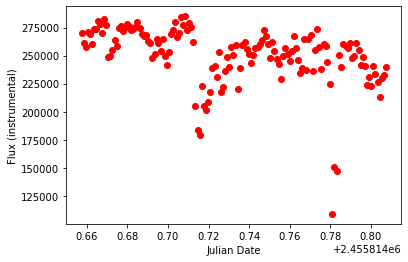

In [80]:
plt.plot(jd_vec, flux_vec, marker='o', color='r', ls='None')

plt.xlabel('Julian Date')
plt.ylabel('Flux (instrumental)')


There is a lot of scatter in this light curve, and it doesn't look great. This is because the conditions of the atmosphere can change with time between different observations. To remove the contamination by the atmosphere we can use our chosen standard star as a reference. 


# Calibrating a light curve using a reference star

<br> <font color='blue'> Exercise: Store the fluxes of a standard star in a vector to use as a reference for calibration of our light curve.  </font>

Hints: 
* Repeat the steps above to extract the flux of the standard star from each image in `imglist`. 


In [82]:
flux_std_vec=[]
for img in imglist:
    #open the image and get the header and data
    hdu= fits.open(img)
    header = hdu[0].header
    img = hdu[0].data

    #store the wcs for this image as 'w', and get the image pixel coordinates for our standard star
    w = WCS(header)
    std_px, std_py = w.wcs_world2pix(STD_RA,STD_DEC, 1)
    
    #background subtract the image data, and extract sources. 
    img = img.byteswap().newbyteorder()
    bkg = sep.Background(img)
    data_sub = img - bkg 
    objects = sep.extract(data_sub, thresh=3.0, err=bkg.globalrms, mask=None, \
                          minarea=10, clean=True, filter_type = 'matched',\
                          clean_param=1.0, segmentation_map=False) 
    
    for i in range(len(objects)):
        if (objects['x'][i]-std_px)**2+(objects['y'][i]- std_py)**2 < 25:
            #use sep.sum_circle to compute the flux of the matching star
            fluxstd, fluxstderr, flagstd = sep.sum_circle(data_sub, [objects['x'][i]], [objects['y'][i]],
                                     5.0, err=bkg.globalrms, gain=1.0)
            
            #fluxstd is an array, but we have one object, 
            #so we just take the first element of this array and append it to our vectors
            flux_std_vec.append(fluxstd[0])
            
            # once we find the closest star we can stop the loop with "break"
            break
            

/Users/jacobjencson/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<font color='blue'> Exercise: Calibrate the star's light curve using the standard. </font>

Hints: 
* Divide the stars fluxes at each date by the corresponding flux of the standard star. You are essentially looking at the flux of our star relative to a source that we expect to be constant.
* You'll want to convert `flux_vec` and `flux_std_vec` to NumPy arrays. These make it easy to do element-wise operations. 
* Since we are looking for a planetary transit signal, you can also normalize the calibrated light curve to make the small dip we are looking for stand out. 
    

Text(0, 0.5, 'Flux Star 2 (Normalized)')

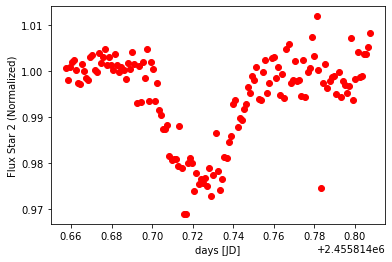

In [83]:
#let's convert the python lists to Numpy arrays
flux_vec = np.array(flux_vec)
flux_std_vec = np.array(flux_std_vec)

#calibrate the light curve by dividing out the flux of the standard. 
#You are essentially looking at the flux of our star relative to a source that we expect to be constant
flux_calib = flux_vec/flux_std_vec

#plot the calibrated light curve, and divide out a 'baseline' value. 
plt.plot(jd_vec, flux_calib/1.875, 'or')
plt.xlabel('days [JD]')
plt.ylabel('Flux Star 2 (Normalized)')


This looks much cleaner! There is a clear planetary transit signal of about 3%. We found a planet around star 2!